In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [2]:
X = np.random.uniform(-2*np.pi, 2*np.pi, 12*10**4)
Y = 2*(2*(np.cos(X))**2-1)**2 - 1 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=29)

In [6]:
def create_model(units, layers):
    model = Sequential()
    model.add(Dense(1, input_dim=1, activation='relu'))
    for i in range(layers):
        model.add(Dense(units, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error')
    return model

In [7]:
def get_error(units, layers):    
    model  = create_model(units, layers)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return mean_squared_error(y_test, y_pred)

In [24]:
errors1 = []
units1 = np.array([24, 48, 72, 128, 256])
errors2 = []
units2 = np.array([12, 24, 36])
errors3 = []
units3 = np.array([8, 16, 24])

layers = 1
for units in units1:
    errors1.append(get_error(units, layers))

layers = 2
for units in units2:
    errors2.append(get_error(units, layers))

layers = 3
for units in units3:
    errors3.append(get_error(units, layers))

units2*=2
units3*=3

1875/1875 [==============================] - 2s 1ms/step - loss: 0.4102


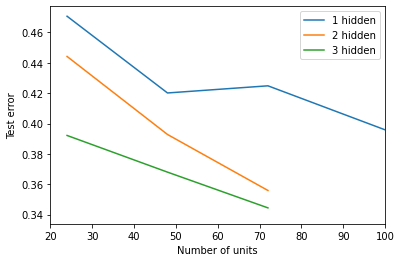

In [27]:
plt.plot(units1, errors1)
plt.plot(units2, errors2)
plt.plot(units3, errors3)
plt.xlim(20,100)
plt.xlabel('Number of units')
plt.ylabel('Test error')
plt.legend(['1 hidden','2 hidden','3 hidden'])